In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cr =  pd.read_csv(r"C:\Users\animesh\Documents\CreditRisk.csv")

In [5]:
#cr.head(50)

In [6]:
#cr.isnull().sum()

In [7]:
cr.Gender.fillna("Male" , inplace = True)
cr.Married.fillna("No" , inplace = True)
cr.Dependents.fillna(0, inplace = True)
cr.Self_Employed.fillna("No" , inplace = True)
cr.LoanAmount.fillna(cr.LoanAmount.mean() , inplace = True)
cr.Credit_History.fillna( 1 , inplace = True)
cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean()  , inplace = True)

In [8]:
#cr.isnull().sum()

In [9]:
# convert categoriacl / non numeric to numeric 

In [10]:
cr.Gender.replace({"Male" :0 , "Female" :1}, inplace = True )
cr.Self_Employed.replace({"Yes" :1 , "No" :0}, inplace = True)
cr.Education.replace({"Graduate" :1 , "Not Graduate" :0}, inplace = True)
cr.Married.replace({"Yes":1 , "No" :0}, inplace = True )
cr.Property_Area.replace({"Semiurban" :1 , "Urban" :2  , "Rural" :0}, inplace = True)
cr.Loan_Status.replace({"Y" :1 , "N" :0}, inplace = True)





In [11]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,0,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,LP001005,0,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,0,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,0,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2,1


In [12]:
cr.shape

(981, 13)

In [13]:
cr_x = cr.iloc[ : , 1:12]
cr_y = cr.iloc[ : , 12]

In [14]:
cr_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2
1,0,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,0
2,0,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2
3,0,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2
4,0,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
cr_x_train , cr_x_test , cr_y_train , cr_y_test = train_test_split(cr_x  , cr_y , test_size = .2)

In [17]:
print(cr_x_train.shape)
print(cr_y_train.shape)
print("------------------------")
print(cr_x_test.shape)
print(cr_y_test.shape)

(784, 11)
(784,)
------------------------
(197, 11)
(197,)


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_reg = LogisticRegression(class_weight= 'balanced')

In [20]:
log_reg.fit(cr_x_train, cr_y_train);

C:\Users\animesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
pred_test = log_reg.predict(cr_x_test)
pred_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
tab1 = confusion_matrix(pred_test , cr_y_test)
tab1

array([[ 32,  16],
       [ 17, 132]], dtype=int64)

In [24]:
tab1.diagonal().sum() / tab1.sum() * 100

83.24873096446701

In [25]:
log_reg.predict_proba(cr_x_test)


array([[0.94173623, 0.05826377],
       [0.17584723, 0.82415277],
       [0.55722022, 0.44277978],
       [0.19970108, 0.80029892],
       [0.30174571, 0.69825429],
       [0.17866007, 0.82133993],
       [0.52005796, 0.47994204],
       [0.19385812, 0.80614188],
       [0.4342881 , 0.5657119 ],
       [0.31340152, 0.68659848],
       [0.93870829, 0.06129171],
       [0.36819544, 0.63180456],
       [0.26859892, 0.73140108],
       [0.20874022, 0.79125978],
       [0.43297162, 0.56702838],
       [0.23445751, 0.76554249],
       [0.33414383, 0.66585617],
       [0.42416271, 0.57583729],
       [0.36181575, 0.63818425],
       [0.3530983 , 0.6469017 ],
       [0.27245359, 0.72754641],
       [0.04496585, 0.95503415],
       [0.54000901, 0.45999099],
       [0.97728128, 0.02271872],
       [0.26592048, 0.73407952],
       [0.20701487, 0.79298513],
       [0.44364666, 0.55635334],
       [0.21996557, 0.78003443],
       [0.07573932, 0.92426068],
       [0.36938576, 0.63061424],
       [0.

In [26]:
log_reg.predict(cr_x_test)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [27]:
len(log_reg.predict_proba(cr_x_test))

197

In [28]:
list(log_reg.coef_)

[array([-7.89772631e-02,  5.65375651e-01, -6.81319980e-02,  3.62445108e-01,
         2.24531935e-01,  2.84801457e-05, -4.35013735e-05, -5.17727480e-03,
        -8.00648191e-03,  3.13205363e+00,  3.70650160e-01])]

In [29]:
log_reg.intercept_

array([0.06388679])

In [30]:
pred_prob_full =log_reg.predict_proba(cr_x)
pred_prob_full = pd.DataFrame(pred_prob_full)

In [31]:
customer_data = pd.DataFrame({"Loan_Id" :cr.Loan_ID , "Prob" : pred_prob_full.iloc[ : , 1]})
customer_data.head()

,Loan_Id,Prob
0,LP001002,0.699751
1,LP001003,0.640038
2,LP001005,0.875556
3,LP001006,0.725119
4,LP001008,0.702292


In [32]:
customer_data = customer_data.sort_values("Prob", ascending= False)
customer_data.head()

,Loan_Id,Prob
497,LP002588,0.985251
133,LP001482,0.976506
14,LP001030,0.975151
686,LP001375,0.974319
575,LP002868,0.972536


In [33]:
#  lets build the AUROC CURVE

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [35]:
pred_test = log_reg.predict(cr_x_test)
#pred_test

In [36]:
roc_auc_score(pred_test , cr_y_test)    # Area under the curve value

0.7762863534675616

In [37]:
pred_test_prob = log_reg.predict_proba(cr_x_test)

In [38]:
fpr , tpr , thre = roc_curve(cr_y_test ,  pred_test_prob[:, 1])

Text(0.3, 0.5, 'Area under curve is .77')

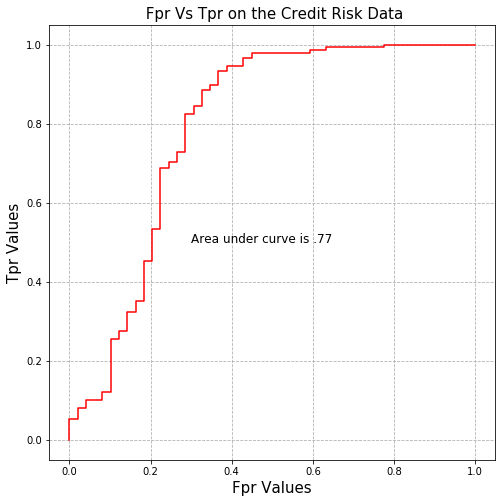

In [43]:
plt.figure(figsize= (8 , 8))
plt.plot(fpr, tpr, color = "r")
plt.grid(linestyle =  '--')
plt.xlabel("Fpr Values", size = 15 )
plt.ylabel("Tpr Values", size = 15 )
plt.title(" Fpr Vs Tpr on the Credit Risk Data",size = 15 )
plt.text(x = .3 , y = .5 , s= "Area under curve is .77" , size = 12)

In [40]:
#from sklearn.linear_model import LogisticRegressionCV
#reg_model = LogisticRegressionCV()

In [41]:
#reg_model.fit(cr_x_train, cr_y_train)

In [42]:
#reg_model.predict(cr_x_test)